###             Water Quality

### Veri Seti:
https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [513]:
import pandas as pd #dataframeler ve seriler uzerindeki islemler icin
import numpy as np #sayisal islemlerim icin
import joblib

import warnings
warnings.filterwarnings('ignore')

In [514]:
df=pd.read_csv('WaterPotability.csv')
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate   
0          NaN  204.890455  20791.318981     7.300212  368.516441  \
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [515]:
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [516]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [517]:
df.isna() #isna ile soru sordum null degerleri goruntuledim, true null

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


Veri setinde ph sütununda 491, sulfate'ta 781, trihalomethanes sütununda 162 eksik veri bulunmaktadır.

In [518]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Toplamda ise 1434 veri eksiktir.

In [519]:
df.isna().sum().sum()

1434

In [520]:
# %10 doluluk oranı eşiğini belirliyoruz.
threshold = 0.10

# Her sütundaki null değerlerin oranını hesaplıyoruz.
null_orani = df.isnull().mean()

# %60'dan fazla null içeren sütunları seçiyoruz.
sutunlar_null_orani = null_orani[null_orani > threshold]

# %60'dan fazla null içeren sütunları ekrana yazdırıyoruz.
print("Null Değer Oranı %10'den Fazla Olan Sütunlar:")
print(sutunlar_null_orani.index.tolist())

Null Değer Oranı %10'den Fazla Olan Sütunlar:
['ph', 'Sulfate']


In [521]:
df = df.drop(['ph', 'Sulfate'],axis=1)

In [522]:
# df.isnull().sum()

In [523]:
df.columns

Index(['Hardness', 'Solids', 'Chloramines', 'Conductivity', 'Organic_carbon',
       'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [524]:
df.count()

Hardness           3276
Solids             3276
Chloramines        3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

In [525]:
df.shape #satir sutun sayisini gosterir. shape[0] satiri shape 1 sutunu gosterir

(3276, 8)

In [526]:
df['Potability'].unique() #potabilitydeki unique(essiz) degerleri gosterdimb

array([0, 1])


İçilebilir nitelikleri içilebilir satırlara göre doldurmanın daha mantıklı olacağından dolayı; Sınıf + Nitelik Bazlı Tamamlama Yapacağım.

In [527]:
df[df['Potability']==0]

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...
3112,195.096968,34277.760400,7.632639,417.465080,13.432557,47.945936,3.622379,0
3113,230.919506,21776.594455,6.908591,395.114961,15.033557,92.697369,3.821456,0
3114,185.906938,27959.987873,7.214510,414.067354,19.882917,36.179003,3.226349,0
3115,179.141018,22291.418577,6.774276,371.264843,18.186801,86.528627,3.860084,0


Tablolarımı sınıf değerlerine göre 2(sınıf sayısı) ayrı tabloya ayırdım. En son birleştireceğim.

In [528]:
df0=df[df['Potability']==0]

In [529]:
df1=df[df['Potability']==1]

In [530]:
df0.shape

(1998, 8)

In [531]:
df1.shape

(1278, 8)

In [532]:
df0.isna().sum()

Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Trihalomethanes    107
Turbidity            0
Potability           0
dtype: int64

In [533]:
df1.isna().sum()

Hardness            0
Solids              0
Chloramines         0
Conductivity        0
Organic_carbon      0
Trihalomethanes    55
Turbidity           0
Potability          0
dtype: int64

In [534]:
import statistics as st

Mod ile tamamlama yapamıyorum, çünkü en çok tekrar eden değer NULL muş. 

Medyan yöntemi ile tamamlama yapacağım. Çünkü medyan ortanca değeri vereceği için ve ortalama kullansaydım da aykırı değer varsa çok iyi bir sonuç alacağımı düşünmediğim için bu yönteme karar verdim. 
 

In [535]:
df0.iloc[999] #1998 veri var ortanca degerine baktığımda (999.) aynı sonucu mu veriyor diye kontrol ettim.

Hardness             215.637255
Solids             28263.310638
Chloramines            6.478948
Conductivity         417.608214
Organic_carbon        16.552543
Trihalomethanes       56.399346
Turbidity              3.933565
Potability             0.000000
Name: 1479, dtype: float64

Ancak Medyan ile yaptığımdaysa ortanca değerim NULL olabilir. 
### Bu sebeple Ortalama ile yapmaya karar verdim.

ph, Sulfate, Trihalomethanes NULL değeri içeren niteliklerim. Bunları dolduracağım.

In [536]:
df0.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,196.733292,21777.490788,7.092175,426.730454,14.364335,66.303555,3.965800,0.0
std,31.057540,8543.068788,1.501045,80.047317,3.334554,16.079320,0.780282,0.0
min,98.452931,320.942611,1.683993,181.483754,4.371899,0.738000,1.450000,0.0
25%,177.823265,15663.057382,6.155640,368.498530,12.101057,55.706530,3.444062,0.0
50%,197.123423,20809.618280,7.090334,422.229331,14.293508,66.542198,3.948076,0.0
75%,216.120687,27006.249009,8.066462,480.677198,16.649485,77.277704,4.496106,0.0
max,304.235912,61227.196008,12.653362,753.342620,28.300000,120.030077,6.739000,0.0


In [537]:
from sklearn.impute import KNNImputer

In [538]:
#KNNImputer kullanarak test veri setindeki null değerleri dolduruyoruz.
imputer = KNNImputer(n_neighbors=4)

# KNNImputer ile null değerleri doldurulmuş yeni bir test veri seti oluşturuyoruz.
df0 = pd.DataFrame(imputer.fit_transform(df0), columns=df0.columns)

In [539]:
# df0.fillna(value= {'ph':ph0, 'Sulfate':sulfate0, 'Trihalomethanes':triha0}, inplace=True) #fillna ile bos satirlarin hepsini dolduruyorum
# df0 #inplace:kalici olmadisini sagliyo. tekrar atamak yerine kullaniyoruz

In [540]:
df0.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [541]:
df1.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,195.800744,22383.991018,7.169338,425.383800,14.160893,66.539684,3.968328,1.0
std,35.547041,9101.010208,1.702988,82.048446,3.263907,16.327419,0.780842,0.0
min,47.432000,728.750830,0.352000,201.619737,2.200000,8.175876,1.492207,1.0
25%,174.330531,15668.985035,6.094134,360.939023,12.033897,56.014249,3.430909,1.0
50%,196.632907,21199.386614,7.215163,420.712729,14.162809,66.678214,3.958576,1.0
75%,218.003420,27973.236446,8.199261,484.155911,16.356245,77.380975,4.509569,1.0
max,323.124000,56488.672413,13.127000,695.369528,23.604298,124.000000,6.494249,1.0


In [542]:
# KNNImputer ile null değerleri doldurulmuş yeni bir test veri seti oluşturuyoruz.
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

In [543]:
# df1.fillna(value={'ph':ph1, 'Sulfate':sulfate1, 'Trihalomethanes':triha1}, inplace=True)
# df1

In [544]:
df1.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [545]:
dframe=pd.concat([df0,df1])
dframe

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0.0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0.0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0.0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0.0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0.0
...,...,...,...,...,...,...,...,...
1273,193.681735,47580.991603,7.166639,526.424171,13.894419,66.687695,4.435821,1.0
1274,193.553212,17329.802160,8.061362,392.449580,19.903225,67.865783,2.798243,1.0
1275,175.762646,33155.578218,7.350233,432.044783,11.039070,69.845400,3.298875,1.0
1276,230.603758,11983.869376,6.303357,402.883113,11.168946,77.488213,4.708658,1.0


In [546]:
dframe.isna().sum()

Hardness           0
Solids             0
Chloramines        0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [547]:
dframe.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,66.414616,3.966786,0.390110
std,32.879761,8768.570828,1.583085,80.824064,3.308162,15.872868,0.780382,0.487849
min,47.432000,320.942611,0.352000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,56.347795,3.439711,0.000000
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,66.656773,3.955028,0.000000
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,77.033445,4.500320,1.000000
max,323.124000,61227.196008,13.127000,753.342620,28.300000,124.000000,6.739000,1.000000


NİTELİKLERİN ORTALAMASI

In [548]:
dframe[dframe.columns].mean() #dframe columns nitelik isimlerini donduruyo

Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.414616
Turbidity              3.966786
Potability             0.390110
dtype: float64

NİTELİKLERİN MEDYANLARI

In [549]:
dframe[dframe.columns].median()

Hardness             196.967627
Solids             20927.833607
Chloramines            7.130299
Conductivity         421.884968
Organic_carbon        14.218338
Trihalomethanes       66.656773
Turbidity              3.955028
Potability             0.000000
dtype: float64

NİTELİKLERİN MODLARI

In [550]:
for column in dframe.columns: #pd de mode fonks yoktu diye kednim st kutuphanesiyle aldım.
    print(column," \t \t ", st.mode(dframe[column]))

Hardness  	 	  204.8904554713363
Solids  	 	  20791.318980747023
Chloramines  	 	  7.300211873184757
Conductivity  	 	  564.3086541722439
Organic_carbon  	 	  10.3797830780847
Trihalomethanes  	 	  70.53195484241276
Turbidity  	 	  2.9631353806316407
Potability  	 	  0.0


NİTELİKLERİN FREKANSLARININ GORSELLESTİRMESİ

In [551]:
import matplotlib.pyplot as plt
import seaborn as sns

In [552]:
for column in dframe.columns:
    counts = dframe[column].value_counts()
    print(counts)

Hardness
204.890455    1
208.438593    1
230.766940    1
156.898917    1
186.353361    1
             ..
191.665998    1
244.846717    1
219.716109    1
208.106548    1
195.102299    1
Name: count, Length: 3276, dtype: int64
Solids
20791.318981    1
17248.618742    1
9727.761716     1
26738.525361    1
21440.738848    1
               ..
17328.161457    1
13858.703936    1
19345.791332    1
17915.085972    1
17404.177061    1
Name: count, Length: 3276, dtype: int64
Chloramines
7.300212    1
7.685370    1
5.943695    1
5.023143    1
7.832474    1
           ..
7.692417    1
9.179442    1
6.029641    1
4.793575    1
7.509306    1
Name: count, Length: 3276, dtype: int64
Conductivity
564.308654    1
269.013635    1
405.761571    1
388.752620    1
461.356227    1
             ..
406.085614    1
403.560482    1
497.477151    1
381.159354    1
327.459760    1
Name: count, Length: 3276, dtype: int64
Organic_carbon
10.379783    1
11.757348    1
12.826509    1
17.196012    1
13.913870    1
     

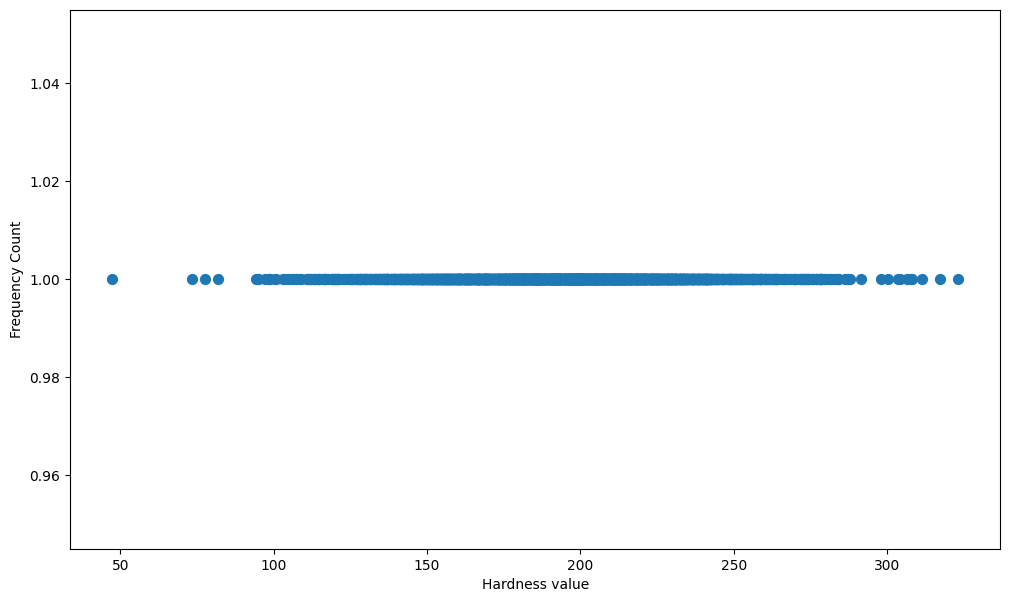

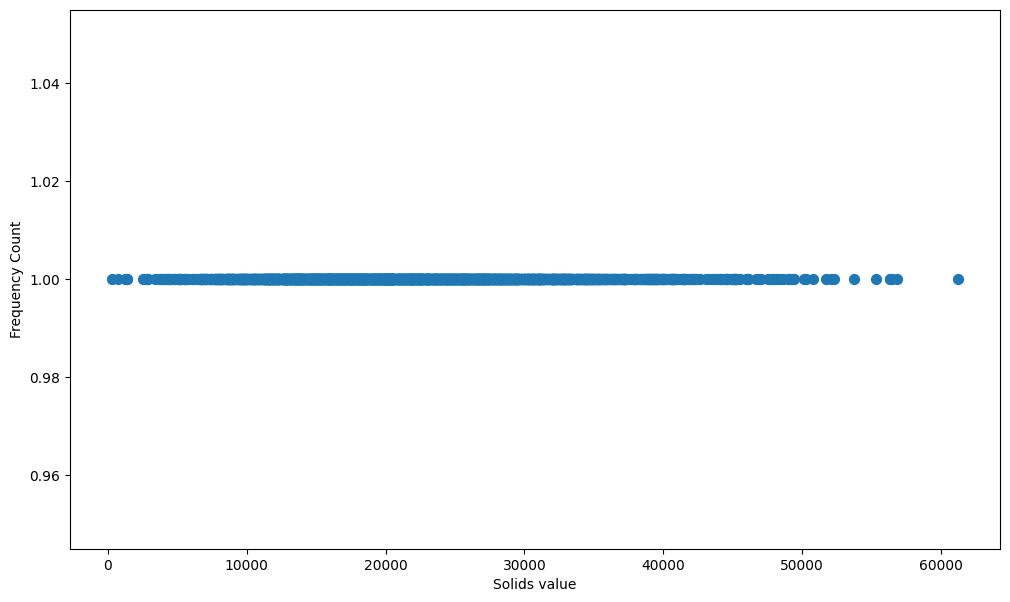

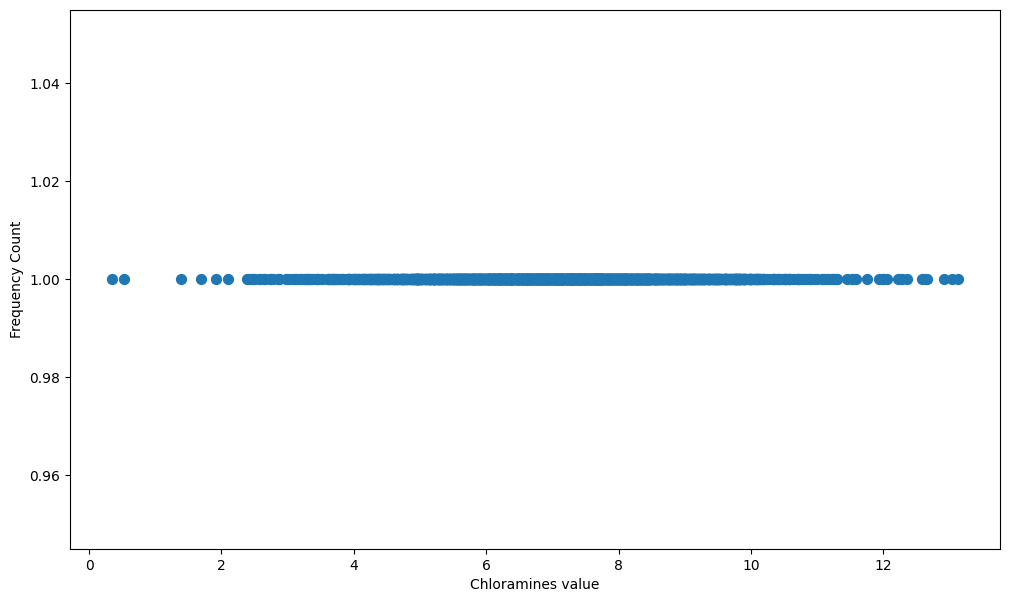

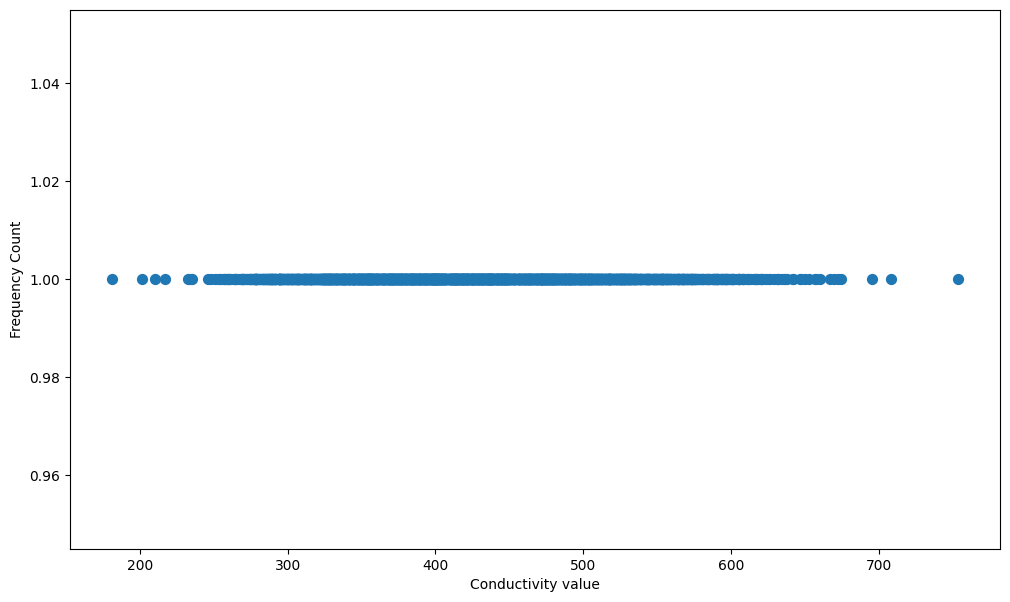

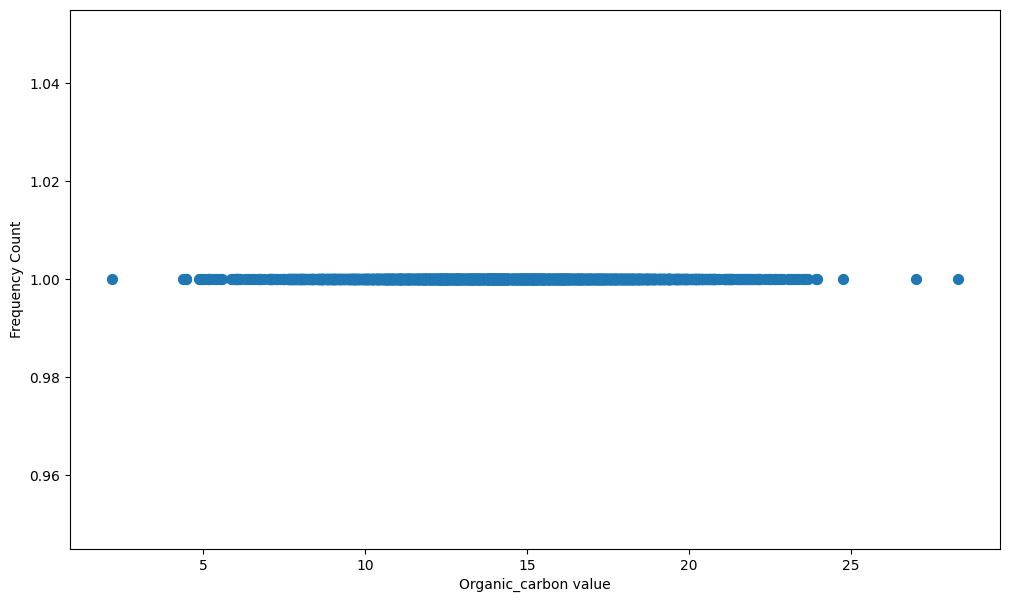

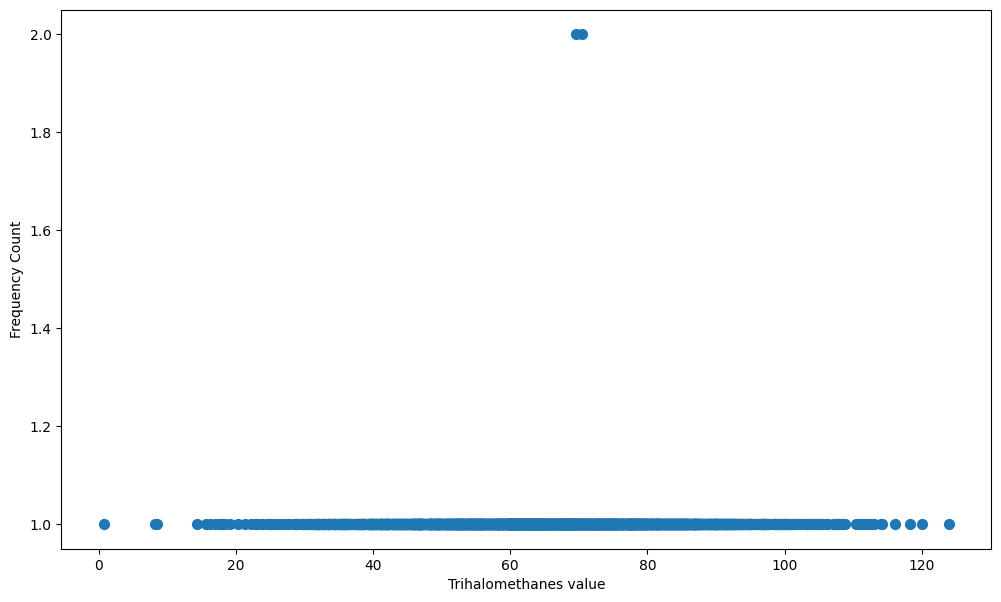

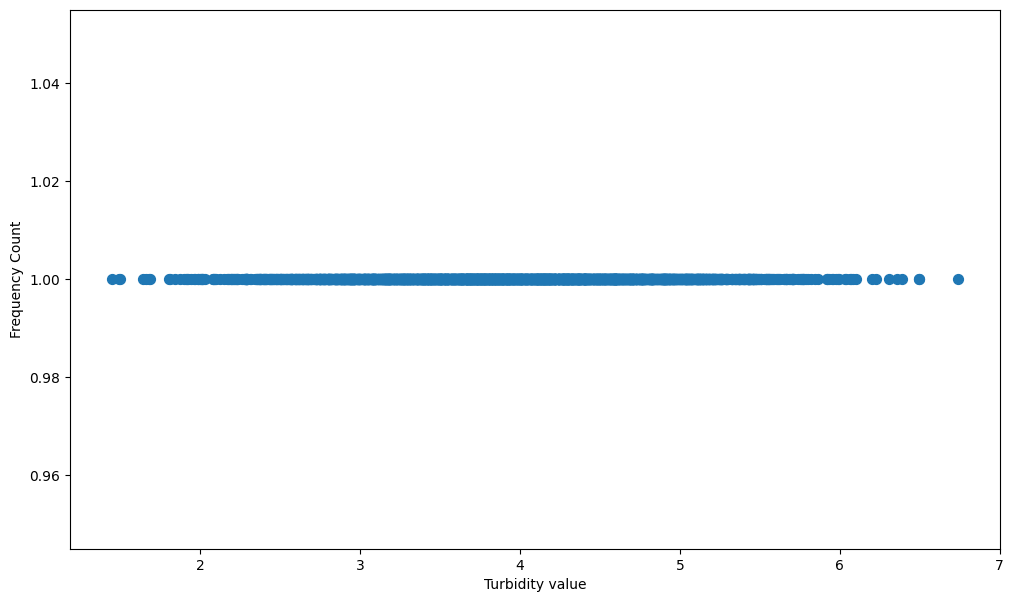

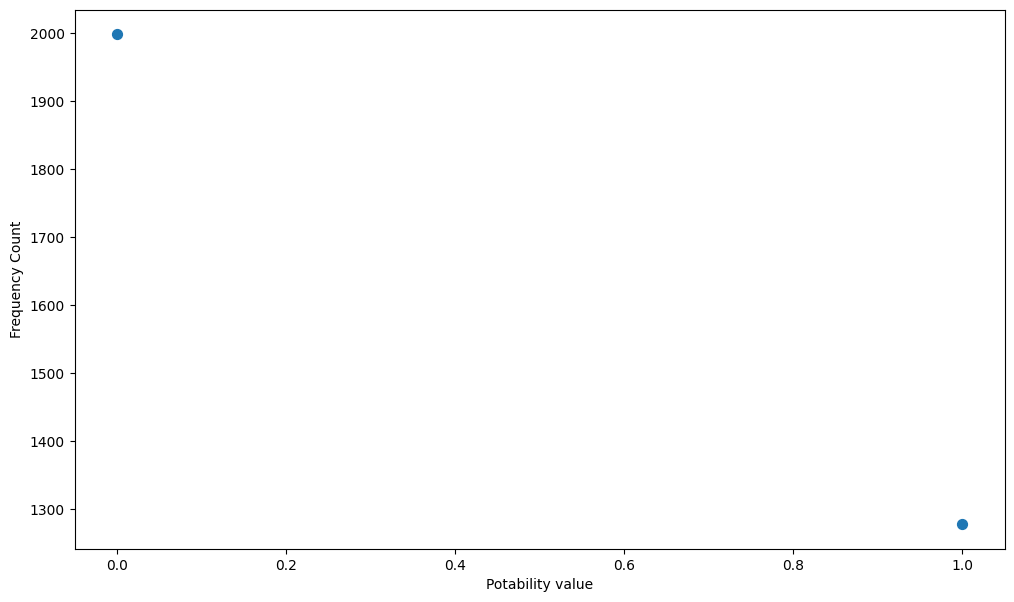

In [553]:
for column in dframe.columns:
    counts = dframe[column].value_counts().to_dict() #value_counts frekansları sayısal olarak gösteriyor.Bunları sözlüğe çeviriyoruz.
    temp_df = pd.DataFrame(counts , index=[0])#sözlük yapısındaki frekansları görselleştirme yapmak için dataframe' e çeviriyoruz.
    
    plt.figure(figsize=(12,7)) #sablonu olustrdum
    plt.scatter(temp_df.columns,temp_df.iloc[0],s=50 )  # scatter ile noktasal yaptım. 
    
    xlabel = column + ' value'
    plt.xlabel(xlabel)
    plt.ylabel('Frequency Count')

    plt.show()



In [554]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.75)
    Q1 = np.quantile(dframe[col], 0.25)
    IQR = Q3 - Q1
    
    print(col, 'niteliğinin IQR(Q3-Q1) değeri:\t ',Q3-Q1,'(',Q3,'-',Q1,')')

Hardness niteliğinin IQR(Q3-Q1) değeri:	  39.81691833734635 ( 216.66745621487073 - 176.85053787752437 )
Solids niteliğinin IQR(Q3-Q1) değeri:	  11666.071830473964 ( 27332.762127438615 - 15666.69029696465 )
Chloramines niteliğinin IQR(Q3-Q1) değeri:	  1.9874662766177282 ( 8.114887032109028 - 6.1274207554913 )
Conductivity niteliğinin IQR(Q3-Q1) değeri:	  116.05789036926546 ( 481.7923044877282 - 365.7344141184627 )
Organic_carbon niteliğinin IQR(Q3-Q1) değeri:	  4.491850210230368 ( 16.557651543843434 - 12.065801333613067 )
Trihalomethanes niteliğinin IQR(Q3-Q1) değeri:	  20.68565020955539 ( 77.03344477339834 - 56.34779456384295 )
Turbidity niteliğinin IQR(Q3-Q1) değeri:	  1.060608917672198 ( 4.50031978728511 - 3.439710869612912 )
Potability niteliğinin IQR(Q3-Q1) değeri:	  1.0 ( 1.0 - 0.0 )


In [555]:
for col in dframe.columns:
    Q3 = np.quantile(dframe[col], 0.75)
    Q1 = np.quantile(dframe[col], 0.25)
    IQR = Q3 - Q1
    
    min = Q1 - 1.5*IQR
    max = Q3 - 1.5*IQR
    print(dframe[(dframe[col]>max)&(dframe[col]<min)])#dframe tablosunun içinde maxtan büyük minden küçük olan aykırı değerleri yazdırıyorum.
    

Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solids, Chloramines, Conductivity, Organic_carbon, Trihalomethanes, Turbidity, Potability]
Index: []
Empty DataFrame
Columns: [Hardness, Solid

In [556]:
dframe.describe()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,196.369496,22014.092526,7.122277,426.205111,14.284970,66.414616,3.966786,0.390110
std,32.879761,8768.570828,1.583085,80.824064,3.308162,15.872868,0.780382,0.487849
min,47.432000,320.942611,0.352000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,176.850538,15666.690297,6.127421,365.734414,12.065801,56.347795,3.439711,0.000000
50%,196.967627,20927.833607,7.130299,421.884968,14.218338,66.656773,3.955028,0.000000
75%,216.667456,27332.762127,8.114887,481.792304,16.557652,77.033445,4.500320,1.000000
max,323.124000,61227.196008,13.127000,753.342620,28.300000,124.000000,6.739000,1.000000


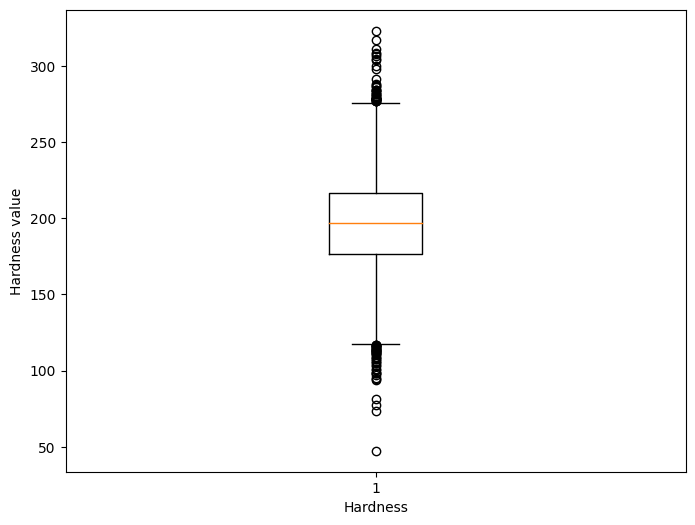

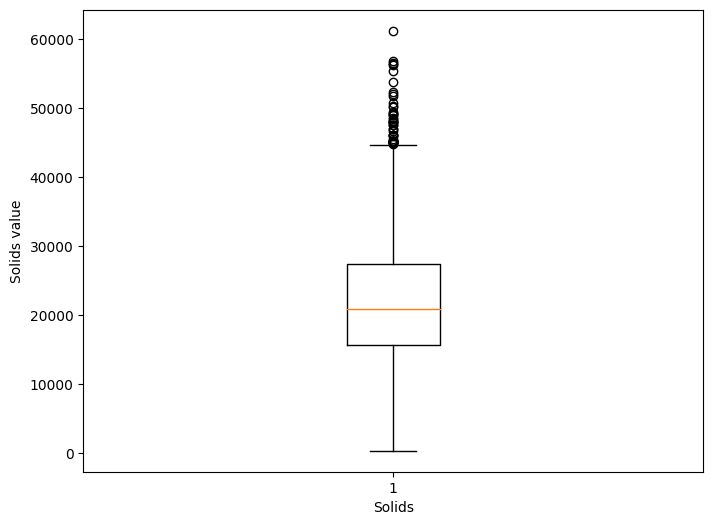

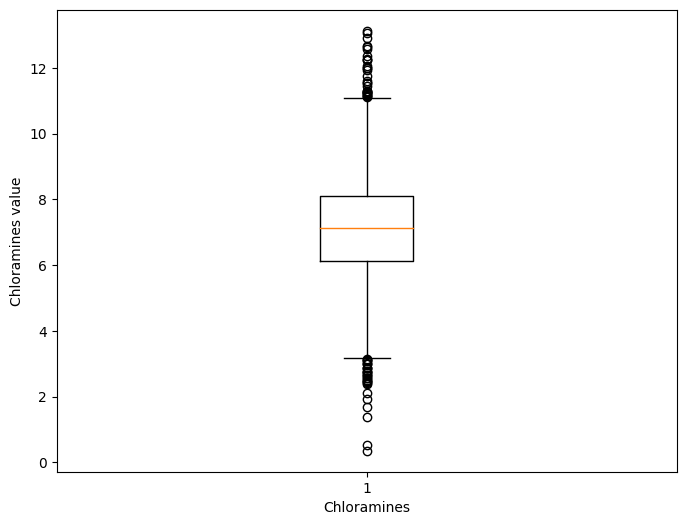

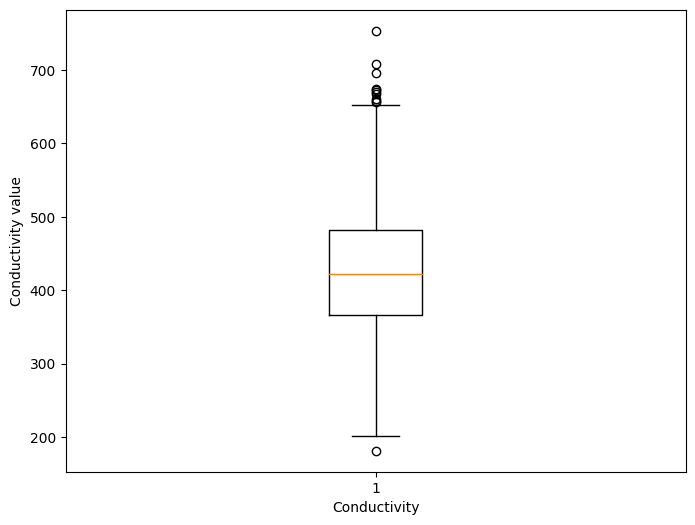

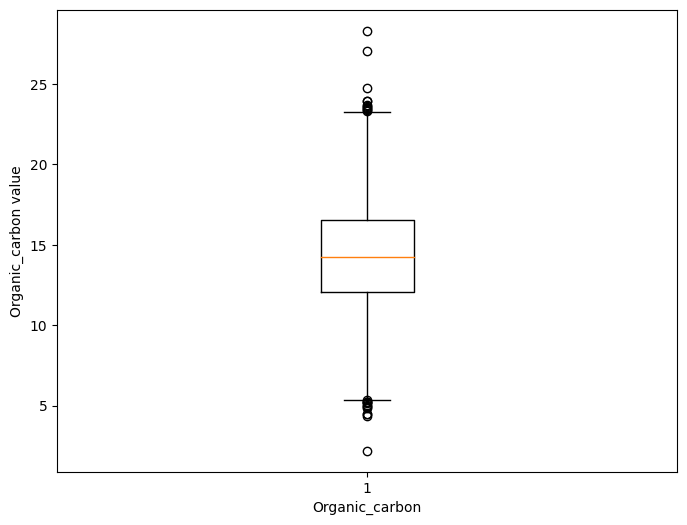

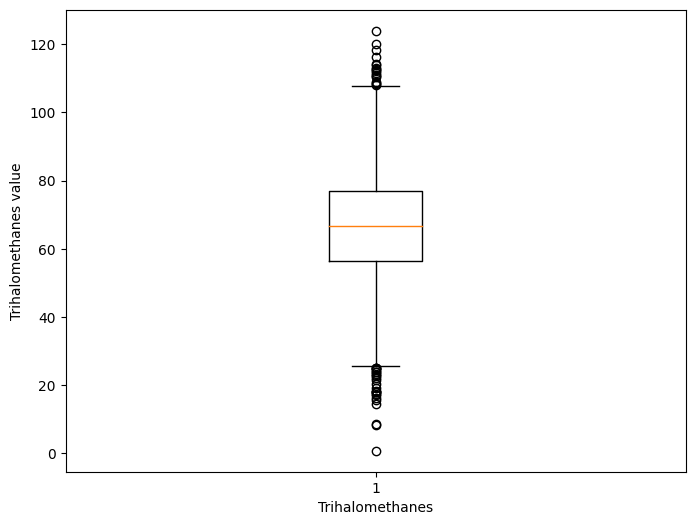

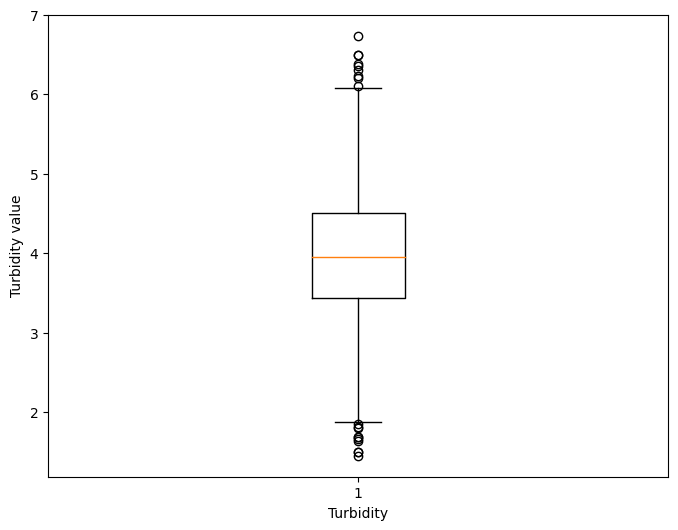

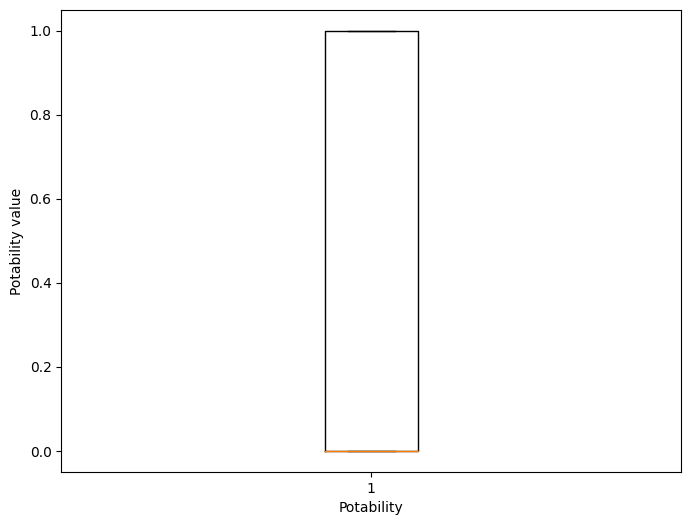

In [557]:
for col in dframe.columns:   
    plt.figure(figsize=(8,6))
    #sns.boxplot(x = dframe[col], y=dframe.Potability)
    plt.boxplot(x = dframe[col])
    
    ylabel = col + ' value'
    plt.xlabel(col)
    plt.ylabel(ylabel)
    
    plt.show()


In [558]:
print('Varyanslar:\n',dframe.var(axis=0))

Varyanslar:
 Hardness           1.081079e+03
Solids             7.688783e+07
Chloramines        2.506158e+00
Conductivity       6.532529e+03
Organic_carbon     1.094394e+01
Trihalomethanes    2.519479e+02
Turbidity          6.089967e-01
Potability         2.379968e-01
dtype: float64


In [559]:
print('Standart Sapmalar:\n',dframe.std(axis=0))

Standart Sapmalar:
 Hardness             32.879761
Solids             8768.570828
Chloramines           1.583085
Conductivity         80.824064
Organic_carbon        3.308162
Trihalomethanes      15.872868
Turbidity             0.780382
Potability            0.487849
dtype: float64


In [560]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [561]:
dframe.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,86.990970,2.963135,0.0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,56.329076,4.500656,0.0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,66.420093,3.055934,0.0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,100.341674,4.628771,0.0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,31.997993,4.075075,0.0


In [562]:
X = dframe.drop('Potability', axis=1)
y = dframe['Potability']

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [564]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.6310975609756098


In [565]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Accuracy:", accuracy_svc)

SVC Accuracy: 0.6326219512195121


In [566]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.5777439024390244


In [567]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression için parametre grid'i
logreg_param_grid = {'C': [0.1, 1, 10]}

# SVC için parametre grid'i
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Random Forest için parametre grid'i
rf_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]}

In [568]:
# GridSearchCV ile parametre optimizasyonu ve en iyi modeli bulma
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param_grid)
logreg_grid.fit(X_train, y_train)
best_logreg = logreg_grid.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Best Logistic Regression Model:", best_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Best Logistic Regression Model: LogisticRegression(C=0.1)
Logistic Regression Accuracy: 0.6310975609756098


In [569]:
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

In [570]:
y_pred_rf = best_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Random Forest Model:", best_rf)
print("Random Forest Accuracy:", accuracy_rf)

Best Random Forest Model: RandomForestClassifier(max_depth=10)
Random Forest Accuracy: 0.6158536585365854


In [571]:
# Modeli kaydetme
model_path = 'random_forest_model.joblib'
joblib.dump(rf, model_path)
print(f"Model saved to {model_path}")


Model saved to random_forest_model.joblib


In [572]:
X_test.iloc[0], y_test.iloc[0]

(Hardness             190.153449
 Solids             20864.340465
 Chloramines            2.386653
 Conductivity         515.631205
 Organic_carbon        18.081003
 Trihalomethanes       63.363082
 Turbidity              3.844231
 Name: 949, dtype: float64,
 1.0)